- My "data augmentation" notes from Codebasics video
- You can have access here : https://www.youtube.com/channel/UCh9nVJoWXmFb7sLApWGcLPQ

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
#Download the dataset from google website

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

#untar =true mean you will unzip the zip file, because it's a zip file
#Get_file indicate what you want to download from the website
#cache_dir indicates where you want to save it
# you can put a "." to install it where your notebook is installed, or you can specify the installation path

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
#We need now to convert this data directory into a pathlib
#There is a module in Python called pathlib to do that
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
#We convert the data directory into a pathlib

In [6]:
#When we transforme the path, we can do thing like this
#This command eput nous permettre de prendre toute les images .jpg
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [8]:
#We want only roses
roses =list(data_dir.glob('roses/*'))

In [9]:
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [10]:
len(list(data_dir.glob('roses/*')))

641

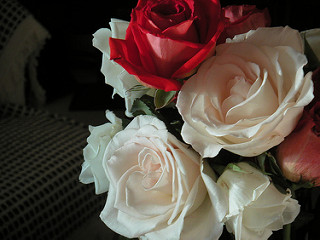

In [11]:
# We will use PIL to show images
PIL.Image.open(str(roses[1]))

In [12]:
#same thing for tulips
tulips =list(data_dir.glob('tulips/*'))
len(list(data_dir.glob('tulips/*')))

799

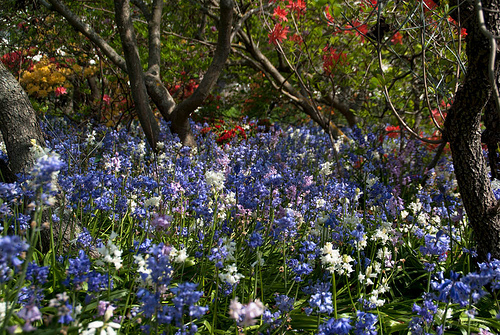

In [13]:
PIL.Image.open(str(tulips[1]))

In [14]:
#We will do the same thing for other flower and store it into a dictionary
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

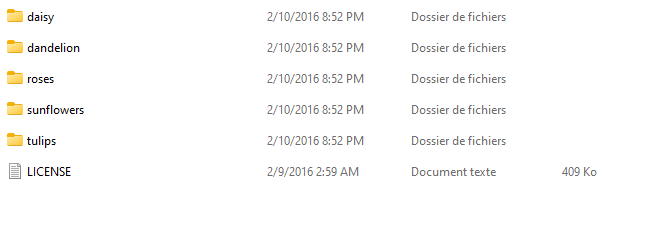

In [15]:
#Now it's easy for me to access any folder
flowers_images_dict['dandelion']

[WindowsPath('datasets/flower_photos/dandelion/10043234166_e6dd915111_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10200780773_c6051a7d71_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10294487385_92a0676c7d_m.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10437652486_aa86c14985.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10443973_aeb97513fc_m.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10477378514_9ffbcec4cf_m.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10486992895_20b344ce2d_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10617162044_8740d4dd9f_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10617191174_9a01753241_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10683189_bd6e371b97.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/1074999133_1e4a1e042e.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10777398353_5a20bb218c.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10778387133_9141024b

In [16]:
#We will also have a labels dict

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [17]:
#we will read cv2 to read thoses image file into open cv object

In [18]:
#You will supply the path and it's give you a numpy array
img = cv2.imread(str(flowers_images_dict['roses'][0]))
#open cv don't accept Windows Path, so you need to add "str"

In [19]:
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [20]:
#You see know that there is a 3d array
img.shape

(240, 179, 3)

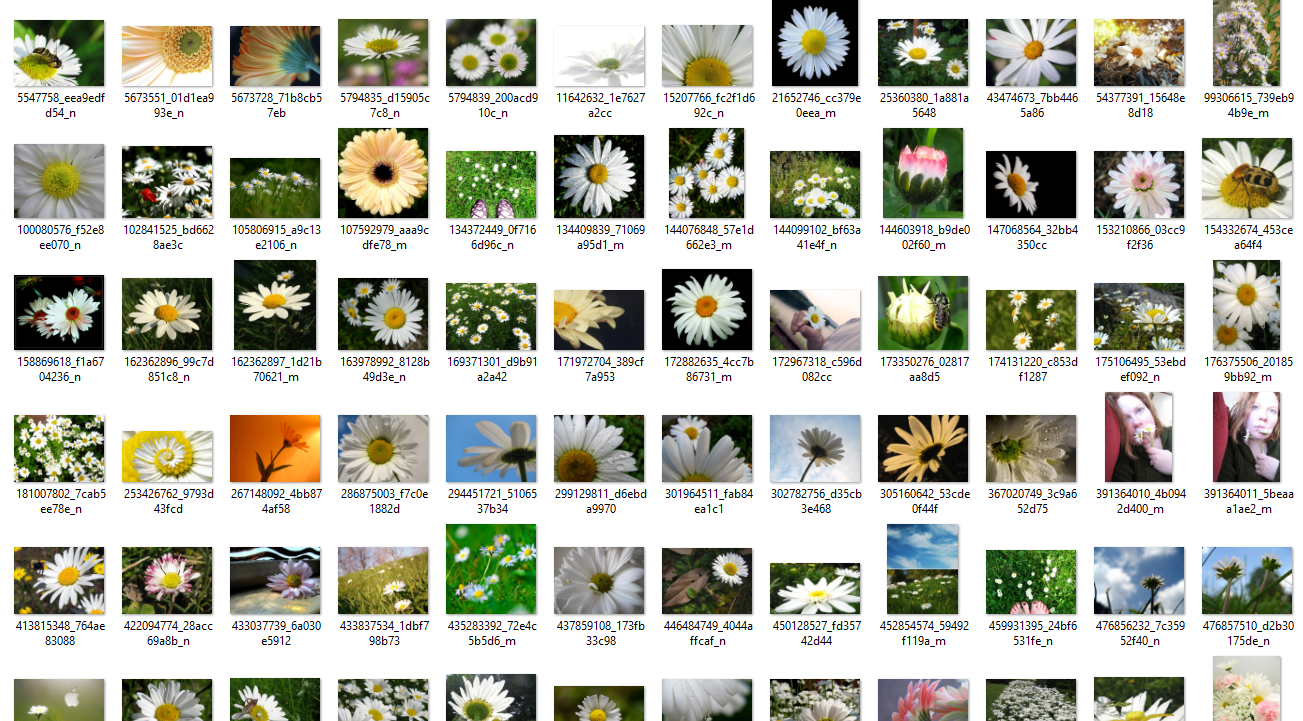

In [21]:
#Opencv also have an option called resize
cv2.resize(img,(180,180)).shape
#The image are not in the same size, we need to have them on the same size

(180, 180, 3)

In [22]:
#(Prepare our X and y)

X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images: #Go through all the images ; have every single image
        img = cv2.imread(str(image)) #Reading the image
        resized_img = cv2.resize(img,(180,180)) #resize it
        X.append(resized_img) #We will add the resized_img to X
        y.append(flowers_labels_dict[flower_name]) #We will add the label to y

In [23]:
y[:5]
#The first 5 images are roses

[0, 0, 0, 0, 0]

In [24]:
X[1]
#It's 3D array (1st for X, 2nd for y and the last one for RGB)

array([[[13, 18, 17],
        [11, 13, 13],
        [ 3,  5,  5],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  1,  1]],

       [[13, 18, 17],
        [ 2,  5,  5],
        [ 0,  2,  2],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  2,  2]],

       [[14, 19, 18],
        [ 7, 12, 11],
        [ 3,  7,  6],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  2,  2]],

       ...,

       [[ 1,  2,  2],
        [ 1,  2,  2],
        [ 8, 10, 10],
        ...,
        [ 0,  0,  0],
        [ 0,  1,  1],
        [ 0,  2,  2]],

       [[ 0,  2,  2],
        [ 1,  2,  2],
        [ 9, 11, 11],
        ...,
        [ 0,  1,  1],
        [ 0,  1,  1],
        [ 0,  2,  2]],

       [[ 3,  4,  4],
        [ 4,  6,  6],
        [10, 12, 12],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 1,  3,  3]]], dtype=uint8)

In [25]:
#Converting X into numpy array

X = np.array(X)
y = np.array(y)

In [26]:
# Building the model : split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [27]:
#Scalling images
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [28]:
X_train_scaled[0]

array([[[0.26666667, 0.30980392, 0.30196078],
        [0.24705882, 0.2745098 , 0.24705882],
        [0.23529412, 0.24313725, 0.21960784],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647]],

       [[0.22352941, 0.24313725, 0.23529412],
        [0.23921569, 0.25098039, 0.23529412],
        [0.23529412, 0.23921569, 0.21568627],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647],
        [0.19607843, 0.16078431, 0.14901961]],

       [[0.23921569, 0.22745098, 0.22352941],
        [0.25098039, 0.25098039, 0.23137255],
        [0.23137255, 0.23137255, 0.20784314],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.19215686, 0.15686275, 0.14509804],
        [0.19607843, 0.16078431, 0.14901961]],

       ...,

       [[0.19215686, 0.4745098 , 0.36470588],
        [0.15686275, 0.25490196, 0.2       ],
        [0.20392157, 0

In [29]:
#CNN

num_classes = 5 #5 types of flowers

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'), #16filters and the size of each filter is 3 by 3 
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(), #Converting into 1D array
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes) #Our classes #No activation = Linear activation, it's ok to not use activation
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 4s 20ms/step - loss: 1.3927 - accuracy: 0.4044
Epoch 2/30
86/86 [==============================] - 2s 21ms/step - loss: 1.0186 - accuracy: 0.6010
Epoch 3/30
86/86 [==============================] - 2s 20ms/step - loss: 0.8343 - accuracy: 0.6846
Epoch 4/30
86/86 [==============================] - 2s 21ms/step - loss: 0.6263 - accuracy: 0.7787
Epoch 5/30
86/86 [==============================] - 2s 22ms/step - loss: 0.4405 - accuracy: 0.8430
Epoch 6/30
86/86 [==============================] - 2s 22ms/step - loss: 0.2956 - accuracy: 0.8975
Epoch 7/30
86/86 [==============================] - 2s 21ms/step - loss: 0.1742 - accuracy: 0.9469
Epoch 8/30
86/86 [==============================] - 2s 21ms/step - loss: 0.1008 - accuracy: 0.9698
Epoch 9/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0596 - accuracy: 0.9855
Epoch 10/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0328 - accuracy: 0.9942
Epoch 11/

In [30]:
model.evaluate(X_test_scaled,y_test)
#It's an exexmple of overfitting, you can see that we have 63% accuracy in the testing sample compared to 99% in the training sample

29/29 [==============================] - 1s 12ms/step - loss: 2.1719 - accuracy: 0.6362


[2.1719095706939697, 0.6361655592918396]

In [31]:
predictions = model.predict(X_test_scaled)
#Get all the prediction, we need to use softmax to convert this array into a set of probabilities
predictions

29/29 [==============================] - 0s 8ms/step


array([[  8.733438  ,  18.477512  ,  -3.1526995 , -11.131147  ,
         -5.0786257 ],
       [  9.867405  ,   9.798385  ,  -9.853091  ,  -9.488101  ,
          0.8919276 ],
       [  0.0658947 ,   9.338747  ,  10.8004875 ,  -6.6804843 ,
         -5.469963  ],
       ...,
       [  0.9129683 ,  -2.5258224 ,  -2.4327168 ,   7.786768  ,
          3.234902  ],
       [  1.3592007 ,   4.1751957 ,  -0.18106022,  -3.2956548 ,
         -0.11213627],
       [  0.3641055 , -11.3946295 ,   1.7463664 ,   3.7377405 ,
          4.4165316 ]], dtype=float32)

In [32]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([5.8637659e-05, 9.9994135e-01, 4.0373213e-10, 1.3838754e-13,
       5.8840210e-11], dtype=float32)>

In [33]:
#We can use argmax function to have only the biggest value (the index)
np.argmax(score)
#It's a daisy flower

1

In [34]:
y_test[0]
#Good prediction for the first test sample

1

# Using Data Augmentation

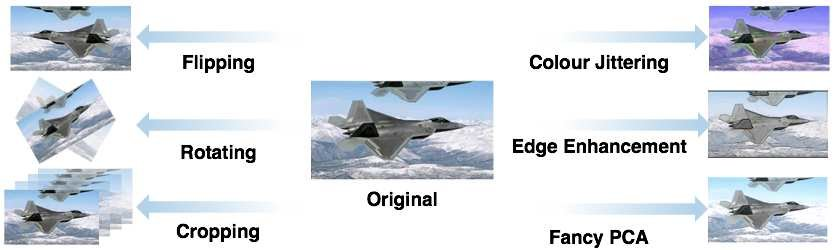

In [39]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

#We will use 2 techniques

In [41]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)  

Epoch 1/30
86/86 [==============================] - 8s 72ms/step - loss: 1.3146 - accuracy: 0.4419
Epoch 2/30
86/86 [==============================] - 6s 73ms/step - loss: 1.0466 - accuracy: 0.5828
Epoch 3/30
86/86 [==============================] - 6s 72ms/step - loss: 0.9155 - accuracy: 0.6450
Epoch 4/30
86/86 [==============================] - 6s 73ms/step - loss: 0.8646 - accuracy: 0.6657
Epoch 5/30
86/86 [==============================] - 6s 75ms/step - loss: 0.8126 - accuracy: 0.6831
Epoch 6/30
86/86 [==============================] - 7s 80ms/step - loss: 0.7678 - accuracy: 0.7028
Epoch 7/30
86/86 [==============================] - 7s 77ms/step - loss: 0.7353 - accuracy: 0.7158
Epoch 8/30
86/86 [==============================] - 7s 80ms/step - loss: 0.7155 - accuracy: 0.7224
Epoch 9/30
86/86 [==============================] - 7s 80ms/step - loss: 0.6801 - accuracy: 0.7358
Epoch 10/30
86/86 [==============================] - 6s 75ms/step - loss: 0.6589 - accuracy: 0.7489
Epoch 11/

In [42]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 0s 9ms/step - loss: 0.9445 - accuracy: 0.7386


[0.9444642066955566, 0.7385621070861816]

In [ ]:
#The